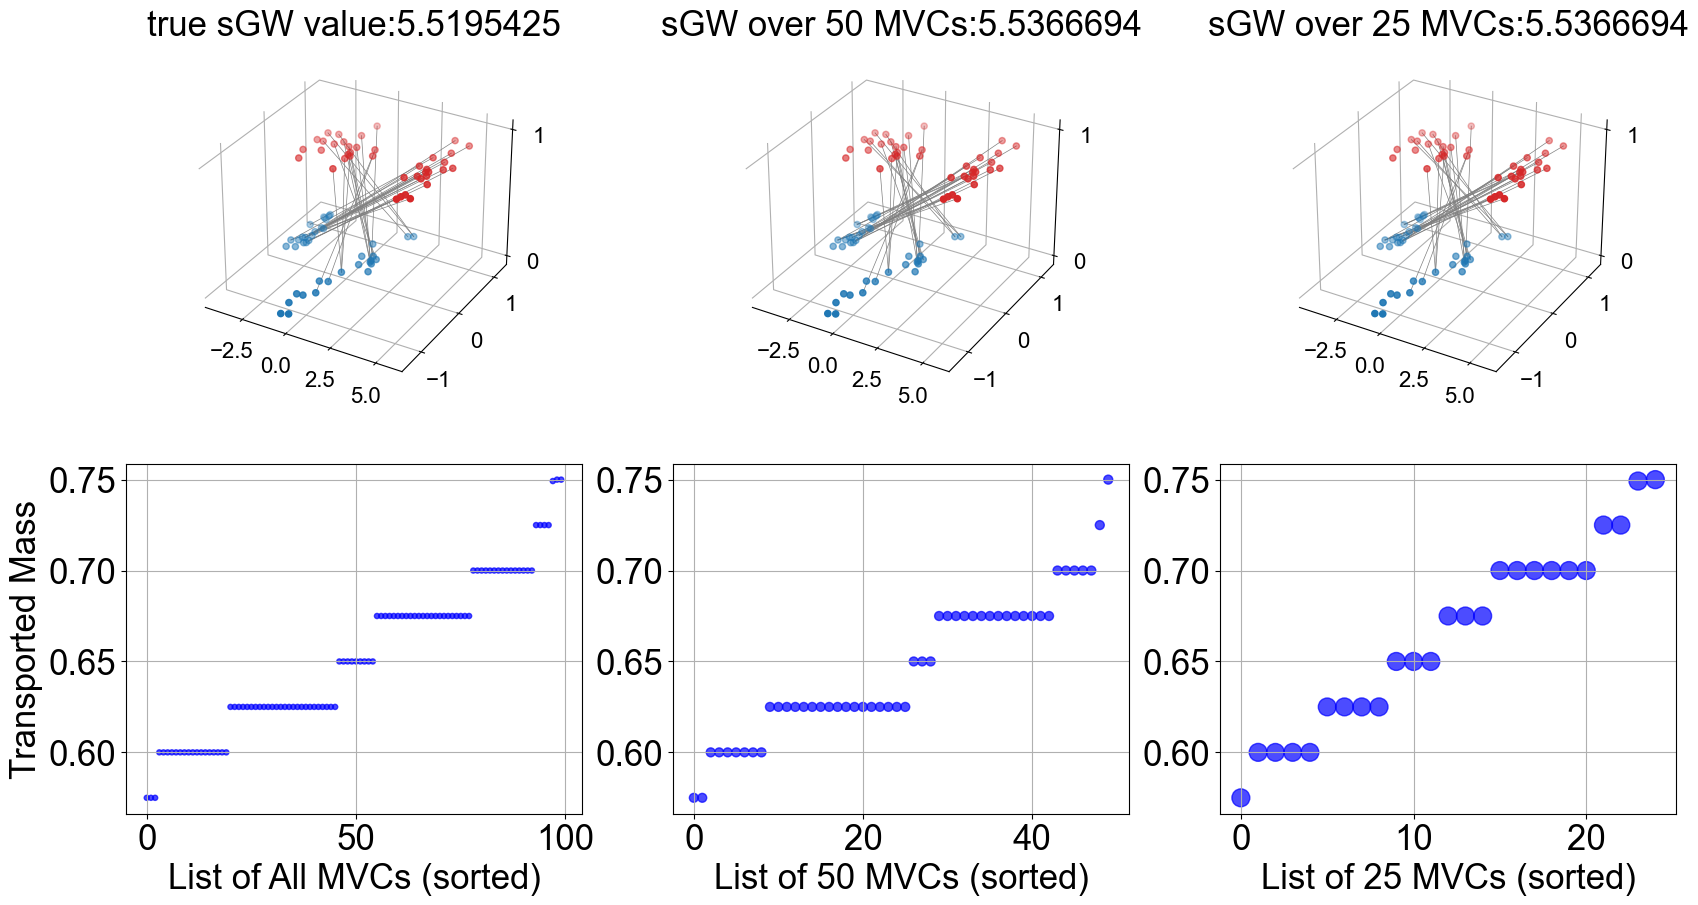

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import networkx as nx
import matplotlib as mpl
mpl.rcParams['font.size']=20
mpl.rcParams['font.sans-serif'] = "Arial"


random_state=1
np.random.seed(random_state) 
fig = plt.figure(figsize=(20, 10), facecolor='white')

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp

#Your generate_data function
def generate_data(nsample, ratio):
    # Generate first ellipse
    s = np.random.uniform(size=(nsample, 3))
    x1 = np.zeros_like(s)
    x1[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x1[:, 1] = 2 * np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x1[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    rot = 0.5 * np.sqrt(2) * np.array([[1, -1, 0], [1, 1, 0], [0, 0, 1]])
    x1 = x1.dot(rot)

    # Generate second circle
    s = np.random.uniform(size=(nsample, 3))
    x2 = np.zeros_like(s)
    x2[:, 0] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.cos(2 * np.pi * s[:, 2])
    )
    x2[:, 1] = np.sqrt(s[:, 0]) * np.sin(2 * np.pi * s[:, 1])
    x2[:, 2] = (
        np.sqrt(s[:, 0])
        * np.cos(2 * np.pi * s[:, 1])
        * np.sin(2 * np.pi * s[:, 2])
    )
    x2 = x2 + np.array([5.0, 0.0, 0.0])
    x = np.concatenate((x1, x2)) + np.array([0.0, 0.0, 8.0])

    # Generate second data from translation
    y = np.concatenate((x1[:, :2], s[:, :2] + np.array([-4.0, 0.0])))
    angle = -np.pi / 4
    x[:nsample] = x[:nsample].dot(
        np.array(
            [
                [np.cos(angle), np.sin(angle), 0],
                [-np.sin(angle), np.cos(angle), 0],
                [0, 0, 1],
            ]
        )
    )
    y[nsample:] = (y[nsample:] - np.mean(y[nsample:], axis=0)).dot(
        np.array(
            [[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]
        )
    ) + np.mean(y[nsample:], axis=0)

    # Generate weights
    a, b = np.ones(x.shape[0]) / x.shape[0], np.ones(y.shape[0]) / y.shape[0]
    b[:n1], b[n1:] = (1 - ratio) * b[:n1], ratio * b[n1:]
    b = b / np.sum(b)
    return a, x, b, y

# Create a mesh of points
n1 = 20
ratio = 0.7
a, x, b, y = generate_data(n1, ratio)
x = np.array(x)
y = np.array(y)

# C1 = sp.spatial.distance.cdist(x, x)
# C2 = sp.spatial.distance.cdist(y, y)

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(231, projection='3d')

# # Plot the data
# ax.scatter(x[:, 0], x[:, 1], x[:, 2], color='red', label='mesh1')
# ax.scatter(y[:, 0], y[:, 1], np.zeros(y[:, 1].shape), color='blue', label='mesh2')
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.legend()

# Add labels
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
###################################################
#################################################true 231
P = np.loadtxt('synthetic_true.csv', delimiter=',')
ax = fig.add_subplot(231, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title('true sGW value:' + str(5.5195425), fontsize = 25)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)


###################################################
#################################################25mvc 233


P = np.loadtxt('synthetic_25mvc.csv', delimiter=',')
ax = fig.add_subplot(233, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title('sGW over 25 MVCs:' + str(5.5366694), fontsize = 25)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)
    
  
 
    
#################################################################    
#######################################################################50mvc 232

P = np.loadtxt('synthetic_50mvc.csv', delimiter=',')
ax = fig.add_subplot(232, projection='3d')
ax.scatter(y[:, 0], y[:, 1], np.zeros(y.shape[0]), c='tab:blue', s=20)
ax.scatter(x[:, 0], x[:, 1], np.ones(x.shape[0]), c='tab:red', s=20)
ax.set_title('sGW over 50 MVCs:' + str(5.5366694), fontsize = 25)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 0.00000001: continue
    j = np.argmax(P[:, i])
    ax.plot3D([y[j, 0], x[i, 0]], [y[j, 1], x[i, 1]], [0, 1], c='gray', linewidth=0.5)

###################################################################################
#######################################################################list_true 234
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

ax = fig.add_subplot(234)

# Data
A_sum_list = np.load('synthetic_A_sum_rho_1_true.npy')
P_sum_list = np.load('synthetic_P_sum_rho_1_true.npy')

sizes = np.array(A_sum_list) * 0.01  # Scale factor for visibility, adjust as needed

# Sort P_sum_list and get sorted indices
sorted_indices = np.argsort(P_sum_list)
sorted_P_sum_list = P_sum_list[sorted_indices]
sorted_sizes = sizes[sorted_indices]

# Set a single color for all points
single_color = 'blue'  # You can change this to any color you prefer

ax.scatter(range(len(sorted_P_sum_list)), sorted_P_sum_list, s=sorted_sizes, c=single_color, alpha=0.7)
ax.set_xlabel('List of All MVCs (sorted)', fontsize=25)
ax.set_ylabel('Transported Mass', fontsize=25)
ax.tick_params(axis='x', labelsize=25)  
ax.tick_params(axis='y', labelsize=25) 
ax.grid(True)

###################################################################################
#######################################################################list_25 235


ax = fig.add_subplot(235)

# Data
A_sum_list = np.load('filtered_A_sum_rho_1_50mvc.npy')
P_sum_list = np.load('filtered_P_sum_rho_1_50mvc.npy')

sizes = np.array(A_sum_list) * 0.03  # Scale factor for visibility, adjust as needed

# Sort P_sum_list and get sorted indices
sorted_indices = np.argsort(P_sum_list)
sorted_P_sum_list = P_sum_list[sorted_indices]
sorted_sizes = sizes[sorted_indices]

# Set a single color for all points
single_color = 'blue'  # You can change this to any color you prefer

ax.scatter(range(len(sorted_P_sum_list)), sorted_P_sum_list, s=sorted_sizes, c=single_color, alpha=0.7)
ax.set_xlabel('List of 50 MVCs (sorted)', fontsize=25)
#ax.set_ylabel('Transported Mass', fontsize=15)
ax.tick_params(axis='x', labelsize=25)  
ax.tick_params(axis='y', labelsize=25) 
ax.grid(True)

###################################################################################
#######################################################################list_50 236


ax = fig.add_subplot(236)

# Data
A_sum_list = np.load('filtered_A_sum_rho_1_25mvc.npy')
P_sum_list = np.load('filtered_P_sum_rho_1_25mvc.npy')

sizes = np.array(A_sum_list) * 0.12  # Scale factor for visibility, adjust as needed

# Sort P_sum_list and get sorted indices
sorted_indices = np.argsort(P_sum_list)
sorted_P_sum_list = P_sum_list[sorted_indices]
sorted_sizes = sizes[sorted_indices]

# Set a single color for all points
single_color = 'blue'  # You can change this to any color you prefer

ax.scatter(range(len(sorted_P_sum_list)), sorted_P_sum_list, s=sorted_sizes, c=single_color, alpha=0.7)
ax.set_xlabel('List of 25 MVCs (sorted)', fontsize=25)
#ax.set_ylabel('Transported Mass', fontsize=15)
ax.tick_params(axis='x', labelsize=25)  
ax.tick_params(axis='y', labelsize=25) 
ax.grid(True)


 
     
    
    
    
##############################################
plt.savefig('synthetic.png')